## MNIST Data with Multi Layer Perceptrons using PyTorch

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

## Convert MNIST images to TENSOR

In [4]:
transform = transforms.ToTensor()

In [5]:
train_data = datasets.MNIST(root = 'Data', train = True, download = True, transform = transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting Data\MNIST\raw\train-images-idx3-ubyte.gz to Data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting Data\MNIST\raw\train-labels-idx1-ubyte.gz to Data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting Data\MNIST\raw\t10k-images-idx3-ubyte.gz to Data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting Data\MNIST\raw\t10k-labels-idx1-ubyte.gz to Data\MNIST\raw



In [6]:
test_data = datasets.MNIST(root='Data', train = False, download = True, transform = transform)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [13]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [15]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [16]:
#visualize one sample from training data
image, label = train_data[0]

In [20]:
image.shape  #28 by 28 pixels

torch.Size([1, 28, 28])

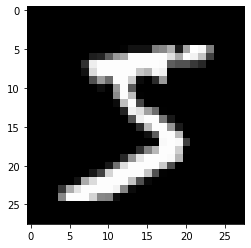

In [25]:
fig = plt.figure()
plt.imshow(image[0,:,:], cmap = 'gray')

## Batch loading with DataLoader
Our training set contains 60,000 records. If we look ahead to our model we have 784 incoming features, hidden layers of 120 and 84 neurons, and 10 output features. Including the bias terms for each layer, the total number of parameters being trained is:<br>

$\begin{split}\quad(784\times120)+120+(120\times84)+84+(84\times10)+10 &=\\
94080+120+10080+84+840+10 &= 105,214\end{split}$<br>


In [26]:
# load in batches as it is lot of samples. 
torch.manual_seed(101)
train_loader = DataLoader(train_data, batch_size = 100, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 500, shuffle = False)

In [28]:
# show grid of images
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) #formatting

In [29]:
#First Batch out of 60000/100 = 60 batches
for images, labels in train_loader:
    break

In [31]:
images.shape

torch.Size([100, 1, 28, 28])

In [35]:
# The first 10 labels
print('Labels:', labels[:10].numpy())

Labels: [   7    2    3    5    8    5    3    6    9    9]


Labels: [   7    2    3    5    8    5    3    6    9    9]


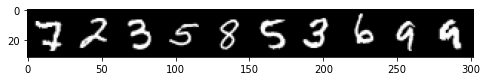

In [37]:
# The first 10 labels
print('Labels:', labels[:10].numpy())

im = make_grid(images[:10], nrow = 10)
plt.figure(figsize=(8,4))
plt.imshow(np.transpose(im.numpy(), (1,2,0)))  # need to transpose from color width height to width height color

In [40]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, input_size=784, output_size = 10, layers=[120, 84]): #28*28, 10 classes and 120 and 84 hidden units
        super().__init__() #instantiate the nn.Module
        self.fc1 = nn.Linear(input_size, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], output_size)
        
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim = 1)  #Multi Class Classification

In [41]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [45]:
# Get number of parameters
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [47]:
784*120

94080

In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [51]:
images.view(100,-1).shape #reshape

torch.Size([100, 784])

## Training the model

In [55]:
import time
start_time = time.time()

# Training
epochs = 10
# Trackers
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        y_pred = model(X_train.view(100,-1)) #flatten out the data
        loss = criterion(y_pred, y_train)
        
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum() #how many correct classifications in the batch
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200 ==0: # print for a few batches
            accuracy = trn_corr.item()*100/(100*b)
            print(f'Epoch {i} batch {b} loss:{loss.item()} accuracy:{accuracy}')
    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())
    
    #visualize for the test set - but do NOT train the data based on this data
    with torch.no_grad(): # do not update the weights and biases
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test.view(500,-1))
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted ==y_test).sum()
    loss = criterion(y_val, y_test)
    test_losses.append(loss.item())
    test_correct.append(tst_corr.item())


total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins')

Epoch 0 batch 200 loss:0.29955002665519714 accuracy:82.655
Epoch 0 batch 400 loss:0.27258992195129395 accuracy:87.2475
Epoch 0 batch 600 loss:0.1816190928220749 accuracy:89.31666666666666
Epoch 1 batch 200 loss:0.17174141108989716 accuracy:94.625
Epoch 1 batch 400 loss:0.049620795994997025 accuracy:95.0125
Epoch 1 batch 600 loss:0.14366936683654785 accuracy:95.25666666666666
Epoch 2 batch 200 loss:0.17057085037231445 accuracy:96.57
Epoch 2 batch 400 loss:0.16885635256767273 accuracy:96.54
Epoch 2 batch 600 loss:0.1114366352558136 accuracy:96.62166666666667
Epoch 3 batch 200 loss:0.14381207525730133 accuracy:97.445
Epoch 3 batch 400 loss:0.012895140796899796 accuracy:97.4825
Epoch 3 batch 600 loss:0.0741964802145958 accuracy:97.39166666666667
Epoch 4 batch 200 loss:0.05271434783935547 accuracy:98.05
Epoch 4 batch 400 loss:0.10294418036937714 accuracy:97.955
Epoch 4 batch 600 loss:0.08694332093000412 accuracy:97.97666666666667
Epoch 5 batch 200 loss:0.07869389653205872 accuracy:98.475
Ep

## Plot the losses

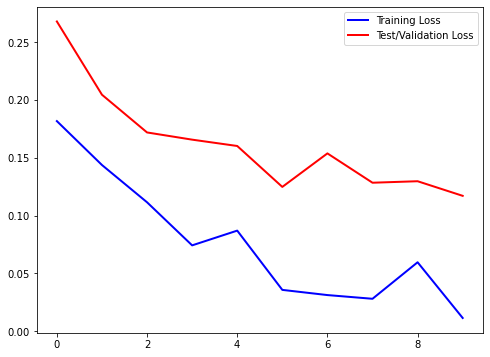

In [61]:
fig=plt.figure(figsize=(8,6))
plt.plot(train_losses, label = 'Training Loss', color='b', linewidth=2)
plt.plot(test_losses, label = 'Test/Validation Loss', color='r', linewidth=2)

plt.legend()

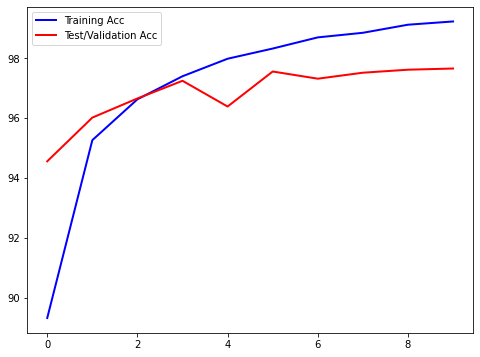

In [64]:
train_acc =[t/600 for t in train_correct]
test_acc =[t/100 for t in test_correct]
fig=plt.figure(figsize=(8,6))
plt.plot(train_acc, label = 'Training Acc', color='b', linewidth=2)
plt.plot(test_acc, label = 'Test/Validation Acc', color='r', linewidth=2)

plt.legend()

In [65]:
# NEW UNSEEN DATA

test_load_all = DataLoader(test_data, batch_size=10000, shuffle = False)


In [67]:
with torch.no_grad():
    correct =0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted ==y_test).sum()

In [70]:
correct.item()/len(test_data)

0.9765

In [73]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 969,    0,    1,    1,    0,    2,    4,    0,    4,    4],
       [   0, 1119,    0,    0,    0,    0,    4,    8,    0,    2],
       [   4,    5, 1021,   11,    4,    0,    3,   16,    5,    0],
       [   0,    2,    1,  990,    0,   17,    1,    1,    3,   10],
       [   0,    0,    1,    0,  953,    1,    1,    0,    0,    6],
       [   0,    0,    0,    0,    0,  855,    2,    0,    3,    4],
       [   3,    3,    2,    1,    7,    8,  941,    0,    4,    1],
       [   0,    0,    3,    3,    3,    0,    0,  995,    2,    3],
       [   3,    6,    2,    2,    4,    8,    2,    4,  952,    9],
       [   1,    0,    1,    2,   11,    1,    0,    4,    1,  970]],
      dtype=int64)

In [76]:
confusion_matrix(predicted, y_test)

array([[ 969,    0,    1,    1,    0,    2,    4,    0,    4,    4],
       [   0, 1119,    0,    0,    0,    0,    4,    8,    0,    2],
       [   4,    5, 1021,   11,    4,    0,    3,   16,    5,    0],
       [   0,    2,    1,  990,    0,   17,    1,    1,    3,   10],
       [   0,    0,    1,    0,  953,    1,    1,    0,    0,    6],
       [   0,    0,    0,    0,    0,  855,    2,    0,    3,    4],
       [   3,    3,    2,    1,    7,    8,  941,    0,    4,    1],
       [   0,    0,    3,    3,    3,    0,    0,  995,    2,    3],
       [   3,    6,    2,    2,    4,    8,    2,    4,  952,    9],
       [   1,    0,    1,    2,   11,    1,    0,    4,    1,  970]],
      dtype=int64)